In [1]:
import pandas as pd
import fbprophet 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving airline_passengers.csv to airline_passengers.csv


In [8]:
import io
df = pd.read_csv(io.BytesIO(uploaded['airline_passengers.csv']))
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [9]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [10]:
df=df.drop(144,axis=0)

In [11]:
df.isna().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

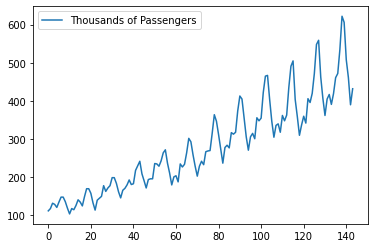

In [12]:
df.plot();


In [13]:
df.columns=["ds","y"]

In [14]:
df


,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [16]:
from fbprophet import Prophet

In [17]:
model=Prophet()

In [18]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [20]:
future_dates=model.make_future_dataframe(periods=365)

In [21]:
future_dates

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30


In [22]:
prediction=model.predict(future_dates)

In [23]:

prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,53.658454,113.042895,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,50.120449,105.698286,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,81.899716,137.371902,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,78.617730,136.690379,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,81.488672,140.032740,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735


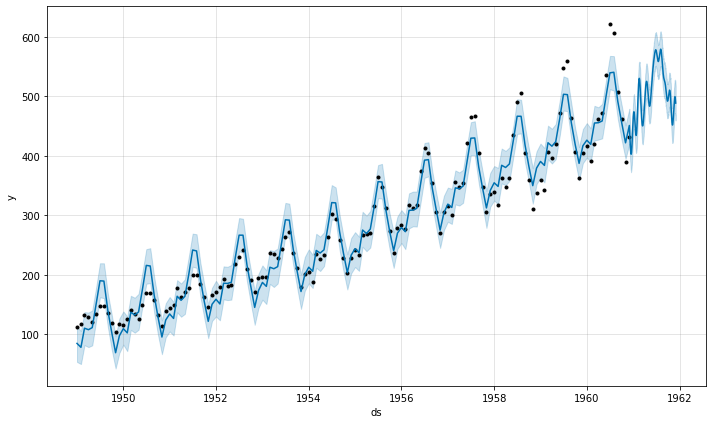

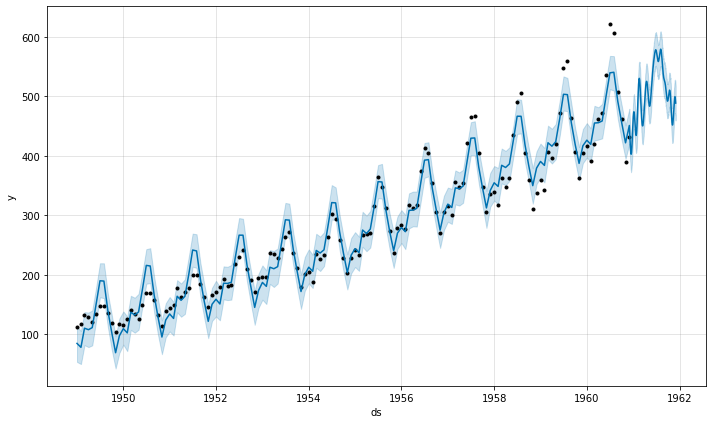

In [25]:
model.plot(prediction)

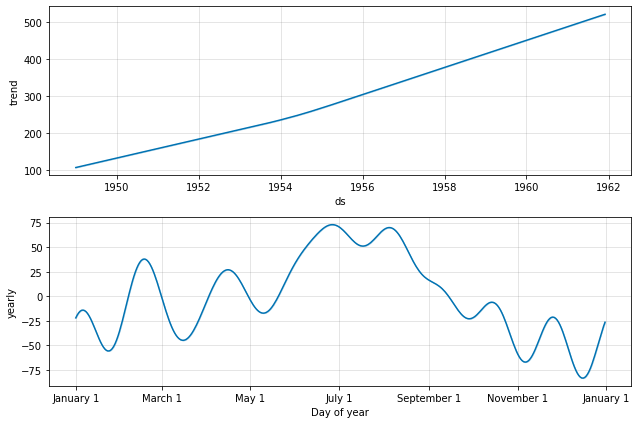

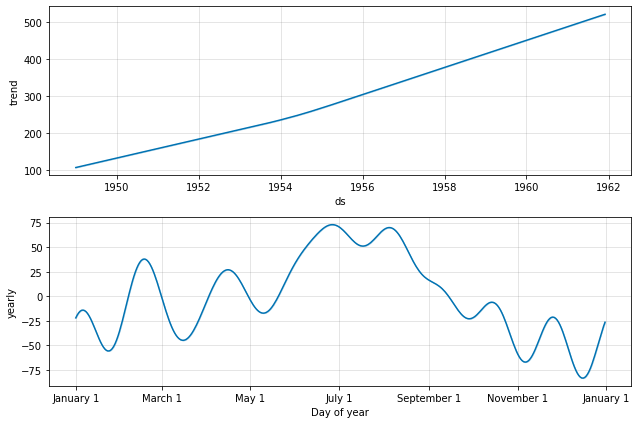

In [26]:
model.plot_components(prediction)